In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.patches import Circle
from skimage.color import lab2rgb, luv2rgb

### Cone Cell Sensitivity Curves (S, M, L)

This chart shows how the human eye detects color using three types of cone cells in the retina. These cone cells are:

- **S-cones**: Sensitive to short wavelengths (blue light)
- **M-cones**: Sensitive to medium wavelengths (green light)
- **L-cones**: Sensitive to long wavelengths (red light)

Each of these cones is tuned to respond best to a specific range of light wavelengths (or colors). Together, they allow us to see the full range of visible colors.

---

### What the Axes Mean

#### 🟦 X-Axis – Wavelength (nm)

- The X-axis shows the **color of the light**, measured by its **wavelength** in nanometers (nm).
- Lower numbers (around **400 nm**) = **violet/blue** light.
- Middle numbers (around **500–550 nm**) = **green** light.
- Higher numbers (around **600–700 nm**) = **orange/red** light.
- This covers the entire **visible spectrum** for humans (about 380–700 nm).

#### 🟩 Y-Axis – Sensitivity (Normalized)

- The Y-axis shows **how strongly each type of cone cell responds** to different colors of light.
- A value of **1.0** means the cone is **fully activated** by that wavelength (most sensitive).
- A value of **0** means the cone **does not respond** at all to that wavelength.

Think of it like a **reaction meter**:
- If the **blue cone (S)** has a high Y value at 440 nm, that means it’s “seeing” that light very clearly.
- If the **green cone (M)** and **red cone (L)** show low values at the same wavelength, they are not very involved in detecting that color.

---

### Why It Matters

- Your brain figures out what color you're seeing based on **which cones are activated** and **how much** they respond.
- For example, if both L and M cones are strongly active, but S is not, your brain might interpret the light as **yellow**.
- This system is the reason you can see **millions of colors** using just three types of cones.

This chart forms the scientific foundation for color models used in displays, imaging, and color correction.

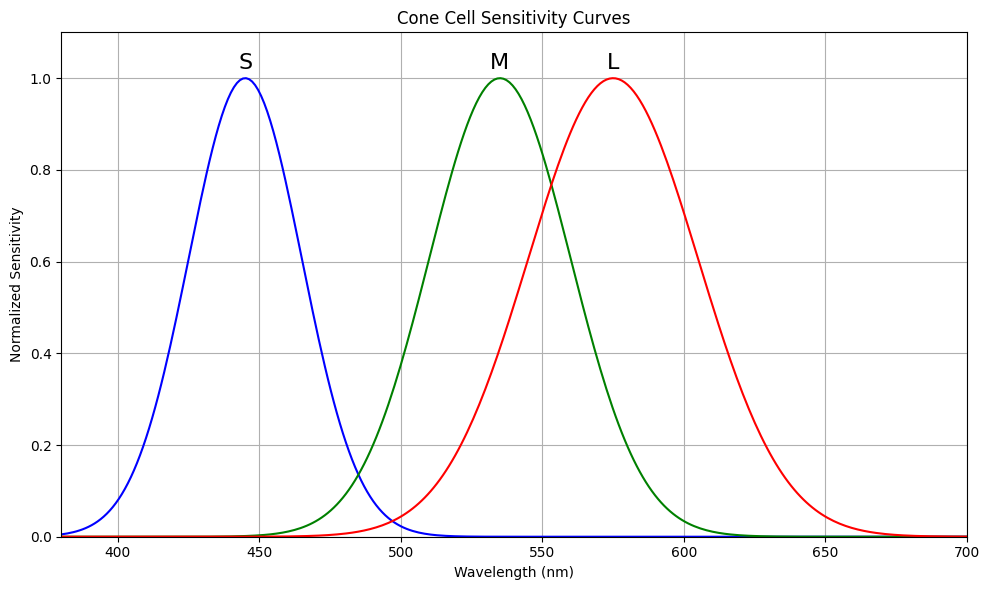

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated data for S, M, and L cone responses (approximate normalized sensitivities)
wavelengths = np.linspace(380, 700, 300)
S = np.exp(-0.5 * ((wavelengths - 445) / 20)**2)
M = np.exp(-0.5 * ((wavelengths - 535) / 25)**2)
L = np.exp(-0.5 * ((wavelengths - 575) / 30)**2)

# Normalize
S /= S.max()
M /= M.max()
L /= L.max()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, S, color='blue', label='S (Short)')
plt.plot(wavelengths, M, color='green', label='M (Medium)')
plt.plot(wavelengths, L, color='red', label='L (Long)')

# Add annotations
plt.text(445, 1.02, 'S', fontsize=16, ha='center')
plt.text(535, 1.02, 'M', fontsize=16, ha='center')
plt.text(575, 1.02, 'L', fontsize=16, ha='center')

plt.ylim(0, 1.1)
plt.xlim(380, 700)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Normalized Sensitivity')
plt.title('Cone Cell Sensitivity Curves')
plt.grid(True)
plt.tight_layout()
plt.show()

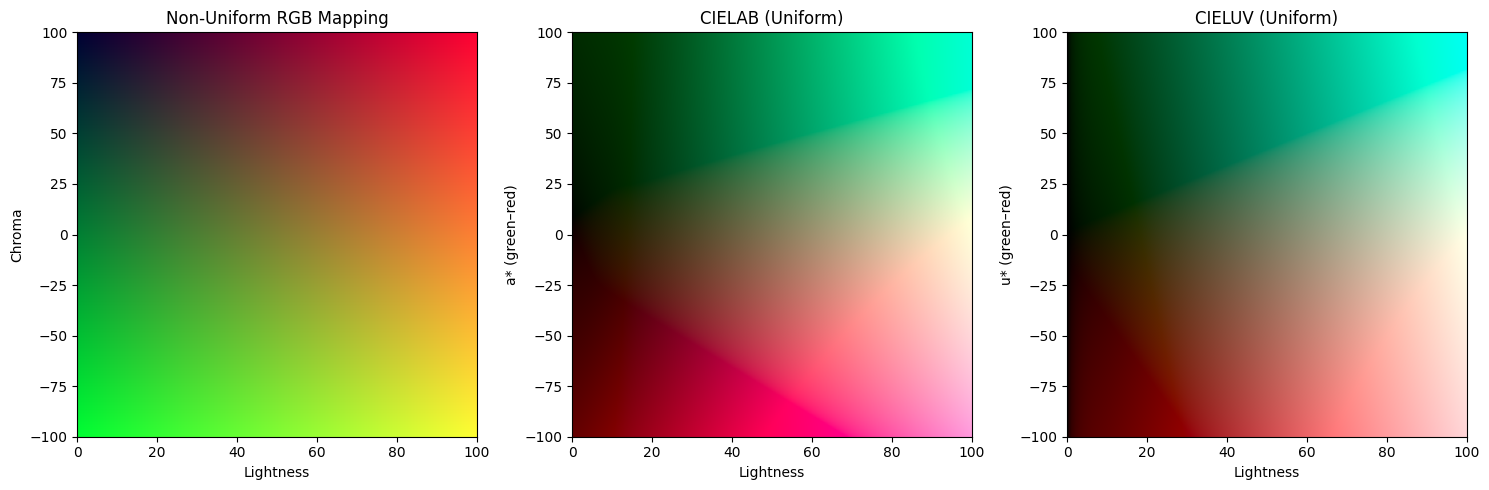

In [12]:
# Create a grid of values
L_vals = np.linspace(0, 100, 300)
chroma_vals = np.linspace(-100, 100, 300)
L_grid, chroma_grid = np.meshgrid(L_vals, chroma_vals)

# Flatten grids for vectorized operations
L_flat = L_grid.flatten()
C_flat = chroma_grid.flatten()

# Set fixed chromatic axis values
b_fixed = 20
v_fixed = 20

# Create LAB and LUV arrays for conversion
lab_array = np.stack([L_flat, C_flat, np.full_like(L_flat, b_fixed)], axis=1)
luv_array = np.stack([L_flat, C_flat, np.full_like(L_flat, v_fixed)], axis=1)

# Reshape to image format after conversion
lab_rgb = lab2rgb(lab_array.reshape(300, 300, 3))
luv_rgb = luv2rgb(luv_array.reshape(300, 300, 3))

# Simulated RGB mapping for comparison (just mapping values, not perceptually uniform)
rgb_img = np.stack([
    L_grid / 100,                    # R = Lightness
    (chroma_grid + 100) / 200,       # G = Chroma normalized
    np.full_like(L_grid, b_fixed / 100)  # B = fixed blue channel
], axis=2)
rgb_img = np.clip(rgb_img, 0, 1)

# Plot the three images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(rgb_img, extent=[0, 100, -100, 100], aspect='auto')
axs[0].set_title("Non-Uniform RGB Mapping")
axs[0].set_xlabel("Lightness")
axs[0].set_ylabel("Chroma")

axs[1].imshow(lab_rgb, extent=[0, 100, -100, 100], aspect='auto')
axs[1].set_title("CIELAB (Uniform)")
axs[1].set_xlabel("Lightness")
axs[1].set_ylabel("a* (green–red)")

axs[2].imshow(luv_rgb, extent=[0, 100, -100, 100], aspect='auto')
axs[2].set_title("CIELUV (Uniform)")
axs[2].set_xlabel("Lightness")
axs[2].set_ylabel("u* (green–red)")

plt.tight_layout()
plt.show()
